#  Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv('weatherHistory.csv')
data1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data1.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
data1['Formatted Date'].dtype

dtype('O')

In [5]:
data1['Date']=pd.to_datetime(data1['Formatted Date'])

In [6]:
data1

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00+02:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00+02:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00+02:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00+02:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00+02:00
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00+02:00
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00+02:00
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00+02:00


In [7]:
cols=['Formatted Date','Summary','Daily Summary']
data2=data1.drop(columns=cols,axis=1).copy()

In [8]:
data2

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006-04-01 00:00:00+02:00
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006-04-01 01:00:00+02:00
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006-04-01 02:00:00+02:00
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006-04-01 03:00:00+02:00
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006-04-01 04:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016-09-09 19:00:00+02:00
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016-09-09 20:00:00+02:00
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016-09-09 21:00:00+02:00
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016-09-09 22:00:00+02:00


In [9]:
len(data2['Date'].unique())

96429

In [10]:
va=[]
for i in data2['Date']:
    va.append((str(i).split(' ')[0]))

In [11]:
data2['date']=va

In [12]:
len(data2['date'].unique())

4018

In [13]:
data3=data2.drop(columns='Date',axis=1).copy()

In [14]:
data3

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),date
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006-04-01
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006-04-01
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006-04-01
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006-04-01
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006-04-01
...,...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016-09-09
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016-09-09
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016-09-09
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016-09-09


In [15]:
data3['Precip Type'].isnull().sum()/len(data3['Precip Type'])

0.005360123583506993

In [16]:
data4=data3[data3['Precip Type'].notna()].copy()

In [17]:
data4

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),date
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006-04-01
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006-04-01
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006-04-01
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006-04-01
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006-04-01
...,...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016-09-09
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016-09-09
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016-09-09
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016-09-09


In [18]:
data4['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x2366fc50190>,
 'caps': [<matplotlib.lines.Line2D at 0x2366fc507f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2366fad3e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2366fc50cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2366fc50fa0>],
 'means': []}

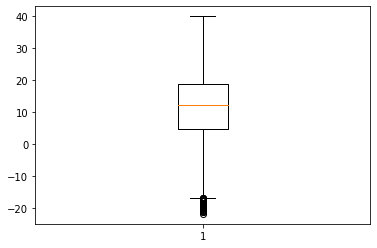

In [19]:
plt.boxplot(data4['Temperature (C)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x236710f1bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x23671101190>,
 'boxes': [<matplotlib.lines.Line2D at 0x236710f18e0>],
 'medians': [<matplotlib.lines.Line2D at 0x23671101730>],
 'fliers': [<matplotlib.lines.Line2D at 0x23671101a00>],
 'means': []}

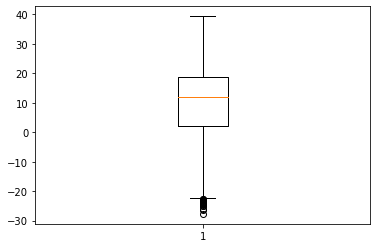

In [20]:
plt.boxplot(data4['Apparent Temperature (C)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2367205e340>,
 'caps': [<matplotlib.lines.Line2D at 0x2367205e8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2367205e070>],
 'medians': [<matplotlib.lines.Line2D at 0x2367205ee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2367206e190>],
 'means': []}

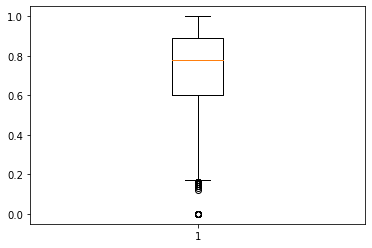

In [21]:
plt.boxplot(data4['Humidity'])

In [22]:
data5=data4.drop(columns=['Loud Cover','Wind Bearing (degrees)','Pressure (millibars)']).copy()
data5

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),date
0,rain,9.472222,7.388889,0.89,14.1197,15.8263,2006-04-01
1,rain,9.355556,7.227778,0.86,14.2646,15.8263,2006-04-01
2,rain,9.377778,9.377778,0.89,3.9284,14.9569,2006-04-01
3,rain,8.288889,5.944444,0.83,14.1036,15.8263,2006-04-01
4,rain,8.755556,6.977778,0.83,11.0446,15.8263,2006-04-01
...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,16.1000,2016-09-09
96449,rain,24.583333,24.583333,0.48,10.0947,15.5526,2016-09-09
96450,rain,22.038889,22.038889,0.56,8.9838,16.1000,2016-09-09
96451,rain,21.522222,21.522222,0.60,10.5294,16.1000,2016-09-09


In [23]:
data5.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.393719
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.382589
Humidity,-0.632148,-0.602390,1.000000,-0.224569,-0.370511
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.100801
Visibility (km),0.393719,0.382589,-0.370511,0.100801,1.000000


#  From above table Tempearture and Apparent Temperature have negative correlation with Humidity

In [24]:
data5

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),date
0,rain,9.472222,7.388889,0.89,14.1197,15.8263,2006-04-01
1,rain,9.355556,7.227778,0.86,14.2646,15.8263,2006-04-01
2,rain,9.377778,9.377778,0.89,3.9284,14.9569,2006-04-01
3,rain,8.288889,5.944444,0.83,14.1036,15.8263,2006-04-01
4,rain,8.755556,6.977778,0.83,11.0446,15.8263,2006-04-01
...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,16.1000,2016-09-09
96449,rain,24.583333,24.583333,0.48,10.0947,15.5526,2016-09-09
96450,rain,22.038889,22.038889,0.56,8.9838,16.1000,2016-09-09
96451,rain,21.522222,21.522222,0.60,10.5294,16.1000,2016-09-09


In [25]:
data5['Precip Type']=data5['Precip Type'].replace(['rain','snow'],[0,1])

In [26]:
data5

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),date
0,0,9.472222,7.388889,0.89,14.1197,15.8263,2006-04-01
1,0,9.355556,7.227778,0.86,14.2646,15.8263,2006-04-01
2,0,9.377778,9.377778,0.89,3.9284,14.9569,2006-04-01
3,0,8.288889,5.944444,0.83,14.1036,15.8263,2006-04-01
4,0,8.755556,6.977778,0.83,11.0446,15.8263,2006-04-01
...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,0.43,10.9963,16.1000,2016-09-09
96449,0,24.583333,24.583333,0.48,10.0947,15.5526,2016-09-09
96450,0,22.038889,22.038889,0.56,8.9838,16.1000,2016-09-09
96451,0,21.522222,21.522222,0.60,10.5294,16.1000,2016-09-09


In [27]:
data5['Precip Type'].unique()

array([0, 1], dtype=int64)

In [28]:
len(data5['date'].unique())

4009

In [29]:
data6=data5.groupby(by='date').mean().copy().reset_index()

In [30]:
data6

,date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,2006-01-01,0.000000,3.873148,-0.447222,0.818333,21.372750,11.112354
1,2006-01-02,0.000000,5.418519,2.042593,0.844583,17.551683,8.956967
2,2006-01-03,0.000000,2.319444,0.223843,0.898333,8.417617,9.011975
3,2006-01-04,0.000000,2.274074,-0.457407,0.905417,11.579925,8.339129
4,2006-01-05,0.000000,2.698148,0.256481,0.948333,9.515100,4.628750
...,...,...,...,...,...,...,...
4004,2016-12-27,0.500000,0.280324,-3.158102,0.890000,10.980200,7.303362
4005,2016-12-28,0.541667,0.224306,-3.223611,0.890000,10.969467,7.304704
4006,2016-12-29,0.541667,0.169676,-3.268056,0.889583,10.892992,7.309400
4007,2016-12-30,0.541667,0.119444,-3.306019,0.889167,10.806454,7.316779


In [31]:
rasn=[]
for i in data6['Precip Type']:
    if i>0.5:
        rasn.append(1)
    else:
        rasn.append(0)

In [32]:
data6['Precip Type']=rasn

In [33]:
data7=data6.copy()

In [34]:
data7

,date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,2006-01-01,0,3.873148,-0.447222,0.818333,21.372750,11.112354
1,2006-01-02,0,5.418519,2.042593,0.844583,17.551683,8.956967
2,2006-01-03,0,2.319444,0.223843,0.898333,8.417617,9.011975
3,2006-01-04,0,2.274074,-0.457407,0.905417,11.579925,8.339129
4,2006-01-05,0,2.698148,0.256481,0.948333,9.515100,4.628750
...,...,...,...,...,...,...,...
4004,2016-12-27,0,0.280324,-3.158102,0.890000,10.980200,7.303362
4005,2016-12-28,1,0.224306,-3.223611,0.890000,10.969467,7.304704
4006,2016-12-29,1,0.169676,-3.268056,0.889583,10.892992,7.309400
4007,2016-12-30,1,0.119444,-3.306019,0.889167,10.806454,7.316779


In [35]:
data7.corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
Precip Type,1.000000,-0.568294,-0.568346,0.261443,-0.063681,-0.385470
Temperature (C),-0.568294,1.000000,0.995739,-0.590567,-0.140229,0.577167
Apparent Temperature (C),-0.568346,0.995739,1.000000,-0.573624,-0.191404,0.556263
Humidity,0.261443,-0.590567,-0.573624,1.000000,-0.058204,-0.697197
Wind Speed (km/h),-0.063681,-0.140229,-0.191404,-0.058204,1.000000,0.196859
Visibility (km),-0.385470,0.577167,0.556263,-0.697197,0.196859,1.000000


# Temperature Vs Humidity

In [36]:
data8=data7.drop(columns=['Apparent Temperature (C)','date']).copy()

In [37]:
data8.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,0,3.873148,0.818333,21.372750,11.112354
1,0,5.418519,0.844583,17.551683,8.956967
2,0,2.319444,0.898333,8.417617,9.011975
3,0,2.274074,0.905417,11.579925,8.339129
4,0,2.698148,0.948333,9.515100,4.628750


In [38]:
X=data8.loc[::,data8.columns!='Humidity']
Y=data8['Humidity']

In [39]:
X
#Y

,Precip Type,Temperature (C),Wind Speed (km/h),Visibility (km)
0,0,3.873148,21.372750,11.112354
1,0,5.418519,17.551683,8.956967
2,0,2.319444,8.417617,9.011975
3,0,2.274074,11.579925,8.339129
4,0,2.698148,9.515100,4.628750
...,...,...,...,...
4004,0,0.280324,10.980200,7.303362
4005,1,0.224306,10.969467,7.304704
4006,1,0.169676,10.892992,7.309400
4007,1,0.119444,10.806454,7.316779


In [40]:
Y

0       0.818333
1       0.844583
2       0.898333
3       0.905417
4       0.948333
          ...   
4004    0.890000
4005    0.890000
4006    0.889583
4007    0.889167
4008    0.888750
Name: Humidity, Length: 4009, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [66]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
poly=StandardScaler()
X_train=poly.fit_transform(x_train)
X_test=poly.fit_transform(x_test)

In [67]:
X_test

array([[ 2.97668536, -1.58480492, -1.39880232, -2.40975716],
       [-0.33594414,  1.24839873, -0.43311585,  0.11890384],
       [-0.33594414, -0.76571343,  0.47036259, -1.50278358],
       ...,
       [-0.33594414,  1.31190403, -0.78283658,  0.40559577],
       [-0.33594414, -1.20847917,  1.23254377,  0.49748149],
       [-0.33594414, -0.06897937,  1.33901519,  0.44612735]])

In [68]:
Model=LinearRegression().fit(X_train,y_train)

In [69]:
Model.coef_

array([-0.02130507, -0.04968945, -0.00038486, -0.07352239])

In [70]:
y_pred=Model.predict(X_test)

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [75]:
r2_score(y_test,y_pred)

0.5443566296429956

In [73]:
mean_absolute_error(y_pred,y_test)

0.07064497572054328

In [76]:
mean_squared_error(y_pred,y_test)

0.008215765051229574

In [84]:
Model.score(X_test,y_pred)

1.0